**Sales Analysis**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score,precision_score, recall_score, f1_score,confusion_matrix
from imblearn.over_sampling import SMOTE



# 1. **Project Overview**
This project focuses on developing a robust machine learning-based fraud detection system for Fastag transactions. Fastag is an electronic toll collection system in India that uses
RFID technology to make toll payments directly from a prepaid account linked to a user’s vehicle. As digital transactions become more prevalent, the risk of fraudulent activities also increases. This project aims to leverage machine learning classification techniques to accurately identify fraudulent transactions, thereby ensuring the security and integrity of Fastag transactions.






In [3]:
df = pd.read_csv('FastagFraudDetection.csv')
df

,Transaction_ID,Timestamp,Vehicle_Type,FastagID,TollBoothID,Lane_Type,Vehicle_Dimensions,Transaction_Amount,Amount_paid,Geographical_Location,Vehicle_Speed,Vehicle_Plate_Number,Fraud_indicator
0,1,1/6/2023 11:20,Bus,FTG-001-ABC-121,A-101,Express,Large,350,120,"13.059816123454882, 77.77068662374292",65,KA11AB1234,Fraud
1,2,1/7/2023 14:55,Car,FTG-002-XYZ-451,B-102,Regular,Small,120,100,"13.059816123454882, 77.77068662374292",78,KA66CD5678,Fraud
2,3,1/8/2023 18:25,Motorcycle,NaN,D-104,Regular,Small,0,0,"13.059816123454882, 77.77068662374292",53,KA88EF9012,Not Fraud
3,4,1/9/2023 2:05,Truck,FTG-044-LMN-322,C-103,Regular,Large,350,120,"13.059816123454882, 77.77068662374292",92,KA11GH3456,Fraud
4,5,1/10/2023 6:35,Van,FTG-505-DEF-652,B-102,Express,Medium,140,100,"13.059816123454882, 77.77068662374292",60,KA44IJ6789,Fraud
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,1/1/2023 22:18,Truck,FTG-445-EDC-765,C-103,Regular,Large,330,330,"13.21331620748757, 77.55413526894684",81,KA74ST0123,Not Fraud
4996,4997,1/17/2023 13:43,Van,FTG-446-LMK-432,B-102,Express,Medium,125,125,"13.21331620748757, 77.55413526894684",64,KA38UV3456,Not Fraud
4997,4998,2/5/2023 5:08,Sedan,FTG-447-PLN-109,A-101,Regular,Medium,115,115,"13.21331620748757, 77.55413526894684",93,KA33WX6789,Not Fraud
4998,4999,2/20/2023 20:34,SUV,FTG-458-VFR-876,B-102,Express,Large,145,145,"13.21331620748757, 77.55413526894684",57,KA35YZ0123,Not Fraud


# 2.   **Dataset Description**
The dataset comprises various features related to Fastag transactions, including transaction details, vehicle information, geographical location, and transaction amounts. The key features are:

*   Transaction_ID: Unique identifier for each transaction.
*   Timestamp: Date and time of the transaction.
*   Vehicle_Type: Type of vehicle involved in the transaction.
*   FastagID: Unique identifier for Fastag.
*   TollBoothID: Identifier for the toll booth.
*   Lane_Type: Type of lane used for the transaction.
*   Vehicle_Dimensions: Dimensions of the vehicle.
*   Transaction_Amount: Amount associated with the transaction.
*   Amount_paid: Amount paid for the transaction.
*   Geographical_Location: Location details of the transaction.
*   Vehicle_Speed: Speed of the vehicle during the transaction.
*   Vehicle_Plate_Number: License plate number of the vehicle.
*   Fraud_indicator: Binary indicator of fraudulent activity (target variable).

In [4]:
df.head()

,Transaction_ID,Timestamp,Vehicle_Type,FastagID,TollBoothID,Lane_Type,Vehicle_Dimensions,Transaction_Amount,Amount_paid,Geographical_Location,Vehicle_Speed,Vehicle_Plate_Number,Fraud_indicator
0,1,1/6/2023 11:20,Bus,FTG-001-ABC-121,A-101,Express,Large,350,120,"13.059816123454882, 77.77068662374292",65,KA11AB1234,Fraud
1,2,1/7/2023 14:55,Car,FTG-002-XYZ-451,B-102,Regular,Small,120,100,"13.059816123454882, 77.77068662374292",78,KA66CD5678,Fraud
2,3,1/8/2023 18:25,Motorcycle,NaN,D-104,Regular,Small,0,0,"13.059816123454882, 77.77068662374292",53,KA88EF9012,Not Fraud
3,4,1/9/2023 2:05,Truck,FTG-044-LMN-322,C-103,Regular,Large,350,120,"13.059816123454882, 77.77068662374292",92,KA11GH3456,Fraud
4,5,1/10/2023 6:35,Van,FTG-505-DEF-652,B-102,Express,Medium,140,100,"13.059816123454882, 77.77068662374292",60,KA44IJ6789,Fraud


In [5]:
df.tail()

,Transaction_ID,Timestamp,Vehicle_Type,FastagID,TollBoothID,Lane_Type,Vehicle_Dimensions,Transaction_Amount,Amount_paid,Geographical_Location,Vehicle_Speed,Vehicle_Plate_Number,Fraud_indicator
4995,4996,1/1/2023 22:18,Truck,FTG-445-EDC-765,C-103,Regular,Large,330,330,"13.21331620748757, 77.55413526894684",81,KA74ST0123,Not Fraud
4996,4997,1/17/2023 13:43,Van,FTG-446-LMK-432,B-102,Express,Medium,125,125,"13.21331620748757, 77.55413526894684",64,KA38UV3456,Not Fraud
4997,4998,2/5/2023 5:08,Sedan,FTG-447-PLN-109,A-101,Regular,Medium,115,115,"13.21331620748757, 77.55413526894684",93,KA33WX6789,Not Fraud
4998,4999,2/20/2023 20:34,SUV,FTG-458-VFR-876,B-102,Express,Large,145,145,"13.21331620748757, 77.55413526894684",57,KA35YZ0123,Not Fraud
4999,5000,3/10/2023 0:59,Bus,FTG-459-WSX-543,C-103,Regular,Large,330,125,"13.21331620748757, 77.55413526894684",86,KA37AB3456,Fraud


In [6]:
df.sample(5)

,Transaction_ID,Timestamp,Vehicle_Type,FastagID,TollBoothID,Lane_Type,Vehicle_Dimensions,Transaction_Amount,Amount_paid,Geographical_Location,Vehicle_Speed,Vehicle_Plate_Number,Fraud_indicator
4731,4732,8/31/2023 5:09,Sedan,FTG-191-YUI-987,A-101,Regular,Medium,115,115,"13.21331620748757, 77.55413526894684",89,TN78GH2345,Not Fraud
3920,3921,2/10/2023 14:01,SUV,FTG-941-ZXC-989,B-102,Express,Large,150,150,"12.84197701525119, 77.67547528176169",45,GA67ST2345,Not Fraud
3860,3861,5/2/2023 22:51,Motorcycle,NaN,D-106,Regular,Small,0,0,"12.84197701525119, 77.67547528176169",58,TN56RS8901,Not Fraud
1876,1877,1/4/2023 3:20,Bus,FTG-257-JKL-901,C-103,Express,Large,300,300,"12.936687032945434, 77.53113977439017",42,KA76CD7190,Not Fraud
4688,4689,9/1/2023 13:07,Van,FTG-148-JKL-877,B-102,Express,Medium,125,125,"13.21331620748757, 77.55413526894684",68,GA56OP4567,Not Fraud


# 3.   **Summary Statistics**

Numerical Summary Statistics



*   count: The number of non-missing values.
*  mean: The average value.
* std: The standard deviation, indicating the spread of the values.
* min: The minimum value.
* 25%: The 25th percentile value (first quartile).
* 50%: The median value (second quartile).
* 75%: The 75th percentile value (third quartile).
* max: The maximum value.
* median: The median value, explicitly added for clarity.
* mode: The most frequently occurring value.
* missing_values: The count of missing values in each column.


In [7]:
df.describe()

,Transaction_ID,Transaction_Amount,Amount_paid,Vehicle_Speed
count,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,161.06200,141.261000,67.851200
std,1443.520003,112.44995,106.480996,16.597547
min,1.000000,0.00000,0.000000,10.000000
25%,1250.750000,100.00000,90.000000,54.000000
50%,2500.500000,130.00000,120.000000,67.000000
75%,3750.250000,290.00000,160.000000,82.000000
max,5000.000000,350.00000,350.000000,118.000000


In [8]:
df.select_dtypes('number').mean()

,0
Transaction_ID,2500.5000
Transaction_Amount,161.0620
Amount_paid,141.2610
Vehicle_Speed,67.8512


In [9]:
df.select_dtypes('number').median()

,0
Transaction_ID,2500.5
Transaction_Amount,130.0
Amount_paid,120.0
Vehicle_Speed,67.0


In [10]:
df.select_dtypes('number').mode().iloc[0]

,0
Transaction_ID,1.0
Transaction_Amount,0.0
Amount_paid,0.0
Vehicle_Speed,55.0


In [11]:
df.isnull().sum()

,0
Transaction_ID,0
Timestamp,0
Vehicle_Type,0
FastagID,549
TollBoothID,0
Lane_Type,0
Vehicle_Dimensions,0
Transaction_Amount,0
Amount_paid,0
Geographical_Location,0


In [12]:
df['FastagID'].fillna(df['FastagID'].mode()[0],inplace=True)
df.isnull().sum()

<ipython-input-12-d61d63c67c5b>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['FastagID'].fillna(df['FastagID'].mode()[0],inplace=True)


,0
Transaction_ID,0
Timestamp,0
Vehicle_Type,0
FastagID,0
TollBoothID,0
Lane_Type,0
Vehicle_Dimensions,0
Transaction_Amount,0
Amount_paid,0
Geographical_Location,0


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Transaction_ID         5000 non-null   int64 
 1   Timestamp              5000 non-null   object
 2   Vehicle_Type           5000 non-null   object
 3   FastagID               5000 non-null   object
 4   TollBoothID            5000 non-null   object
 5   Lane_Type              5000 non-null   object
 6   Vehicle_Dimensions     5000 non-null   object
 7   Transaction_Amount     5000 non-null   int64 
 8   Amount_paid            5000 non-null   int64 
 9   Geographical_Location  5000 non-null   object
 10  Vehicle_Speed          5000 non-null   int64 
 11  Vehicle_Plate_Number   5000 non-null   object
 12  Fraud_indicator        5000 non-null   object
dtypes: int64(4), object(9)
memory usage: 507.9+ KB


In [14]:
df.drop_duplicates(inplace = True)
df

,Transaction_ID,Timestamp,Vehicle_Type,FastagID,TollBoothID,Lane_Type,Vehicle_Dimensions,Transaction_Amount,Amount_paid,Geographical_Location,Vehicle_Speed,Vehicle_Plate_Number,Fraud_indicator
0,1,1/6/2023 11:20,Bus,FTG-001-ABC-121,A-101,Express,Large,350,120,"13.059816123454882, 77.77068662374292",65,KA11AB1234,Fraud
1,2,1/7/2023 14:55,Car,FTG-002-XYZ-451,B-102,Regular,Small,120,100,"13.059816123454882, 77.77068662374292",78,KA66CD5678,Fraud
2,3,1/8/2023 18:25,Motorcycle,FTG-000-QAZ-210,D-104,Regular,Small,0,0,"13.059816123454882, 77.77068662374292",53,KA88EF9012,Not Fraud
3,4,1/9/2023 2:05,Truck,FTG-044-LMN-322,C-103,Regular,Large,350,120,"13.059816123454882, 77.77068662374292",92,KA11GH3456,Fraud
4,5,1/10/2023 6:35,Van,FTG-505-DEF-652,B-102,Express,Medium,140,100,"13.059816123454882, 77.77068662374292",60,KA44IJ6789,Fraud
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,1/1/2023 22:18,Truck,FTG-445-EDC-765,C-103,Regular,Large,330,330,"13.21331620748757, 77.55413526894684",81,KA74ST0123,Not Fraud
4996,4997,1/17/2023 13:43,Van,FTG-446-LMK-432,B-102,Express,Medium,125,125,"13.21331620748757, 77.55413526894684",64,KA38UV3456,Not Fraud
4997,4998,2/5/2023 5:08,Sedan,FTG-447-PLN-109,A-101,Regular,Medium,115,115,"13.21331620748757, 77.55413526894684",93,KA33WX6789,Not Fraud
4998,4999,2/20/2023 20:34,SUV,FTG-458-VFR-876,B-102,Express,Large,145,145,"13.21331620748757, 77.55413526894684",57,KA35YZ0123,Not Fraud


# 4.   **Data Visualisation**

**Visualize the distribution of the target variable**

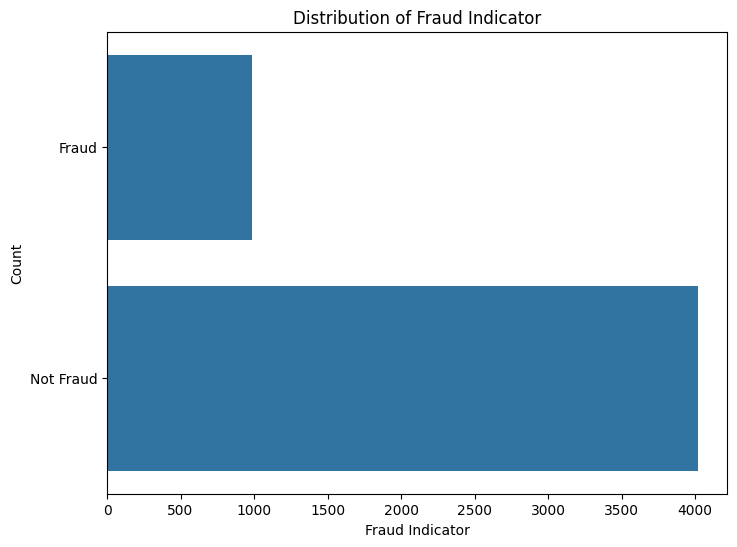

In [15]:
plt.figure(figsize=(8, 6))
sns.countplot(df['Fraud_indicator'])
plt.title('Distribution of Fraud Indicator')
plt.xlabel('Fraud Indicator')
plt.ylabel('Count')
plt.show()

**Visualize the distribution of Transaction Amounts**

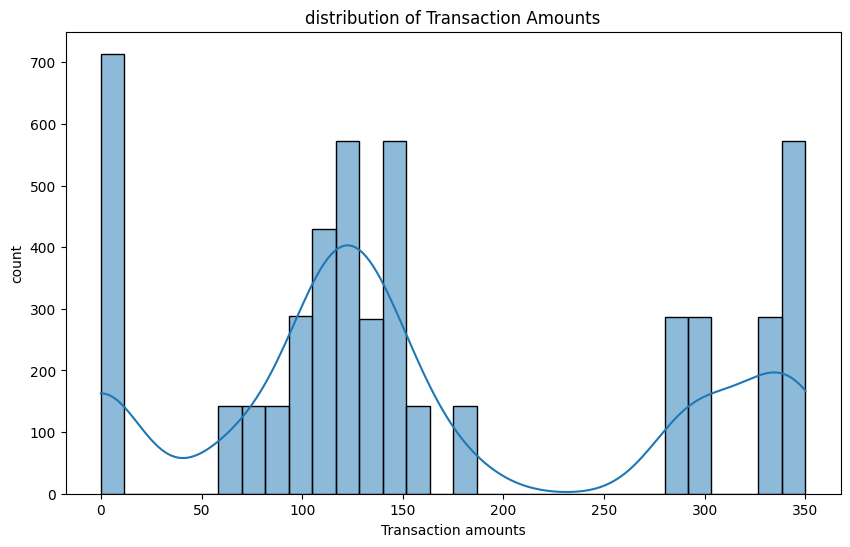

In [16]:
plt.figure(figsize=(10,6))
sns.histplot(df['Transaction_Amount'],bins=30,kde = True)
plt.title('distribution of Transaction Amounts')
plt.xlabel('Transaction amounts')
plt.ylabel('count')
plt.show()

**Visualize the distribution of Amount Paid**

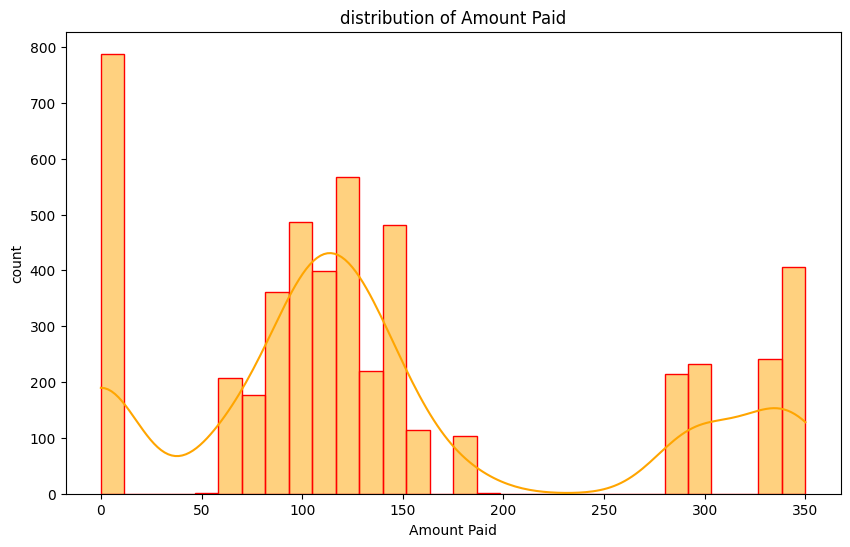

In [17]:
plt.figure(figsize=(10,6))
sns.histplot(df['Amount_paid'],bins=30,kde = True,color='orange',edgecolor='red')
plt.title('distribution of Amount Paid')
plt.xlabel('Amount Paid')
plt.ylabel('count')
plt.show()

**Visualize the distribution of Vehicle Speed**

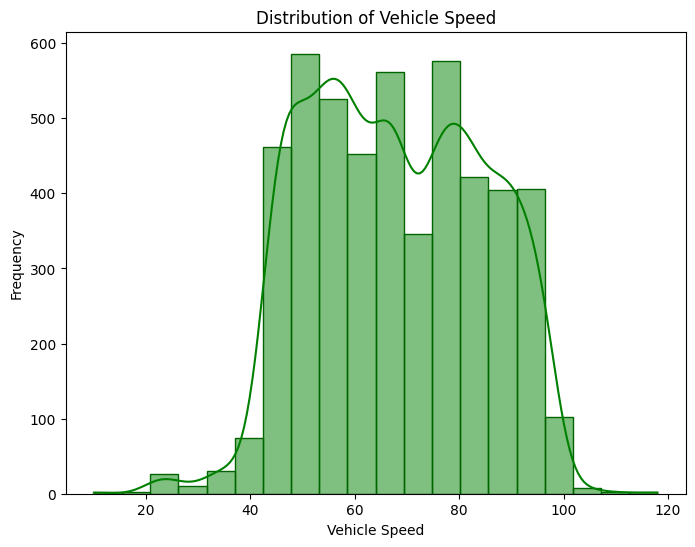

In [18]:
plt.figure(figsize=(8, 6))
sns.histplot(df['Vehicle_Speed'], bins=20, kde=True,color='green',edgecolor ='darkgreen' )
plt.title('Distribution of Vehicle Speed')
plt.xlabel('Vehicle Speed')
plt.ylabel('Frequency')
plt.show()

**Visualize the distribution of Vehicle Speed**

Text(0.5, 1.0, 'Transaction Amount vs Amount Paid')

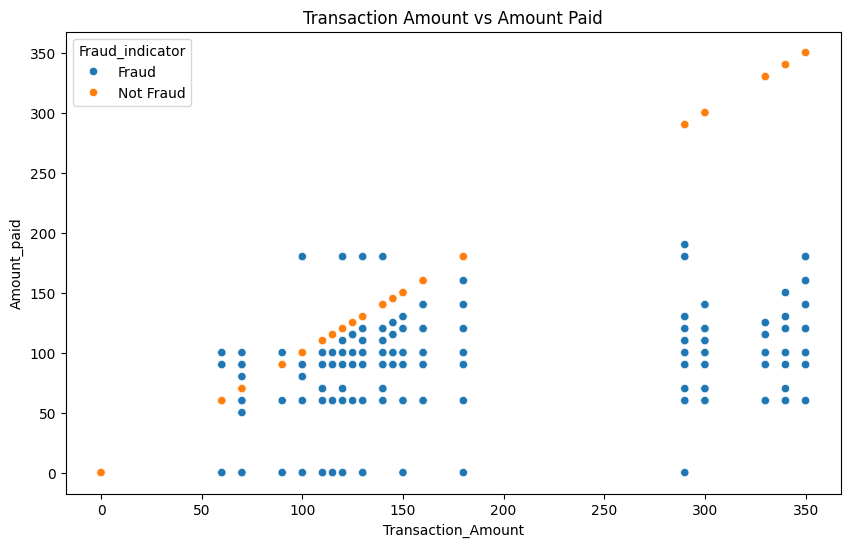

In [19]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Transaction_Amount',y = 'Amount_paid',hue ='Fraud_indicator',data=df)
plt.title('Transaction Amount vs Amount Paid')

**Countplots for Vehicle Type variables by fraud indicator**

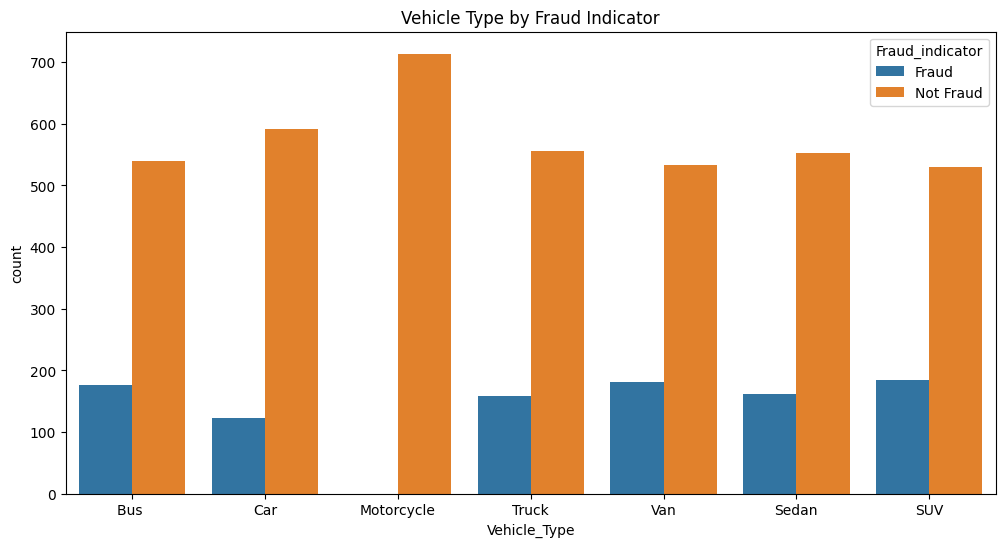

In [20]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Vehicle_Type', hue='Fraud_indicator', data=df)
plt.title('Vehicle Type by Fraud Indicator')
plt.show()

**Countplots for Lane type variables by fraud indicator**

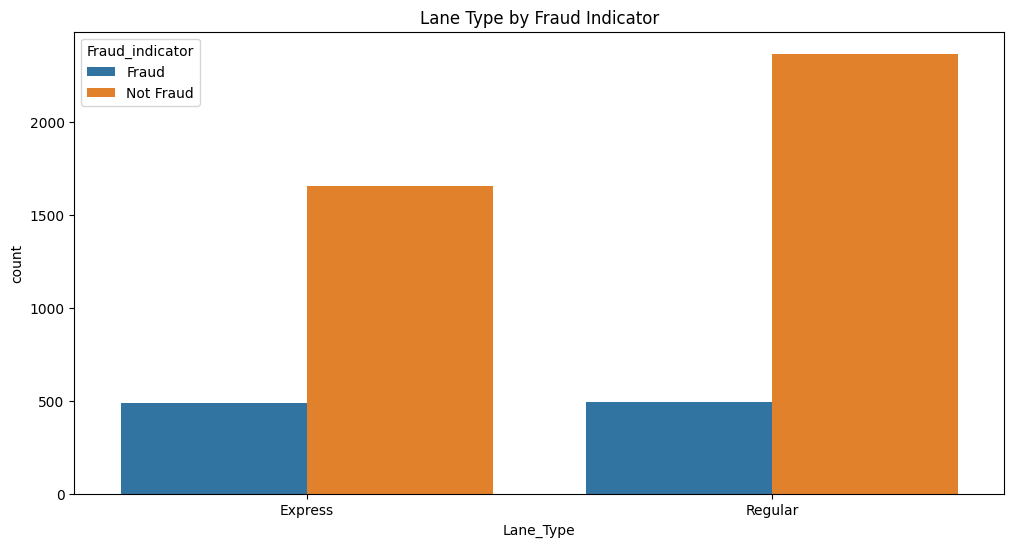

In [21]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Lane_Type', hue='Fraud_indicator', data=df)
plt.title('Lane Type by Fraud Indicator')
plt.show()

**Countplots for Geographical Location variables by fraud indicator**

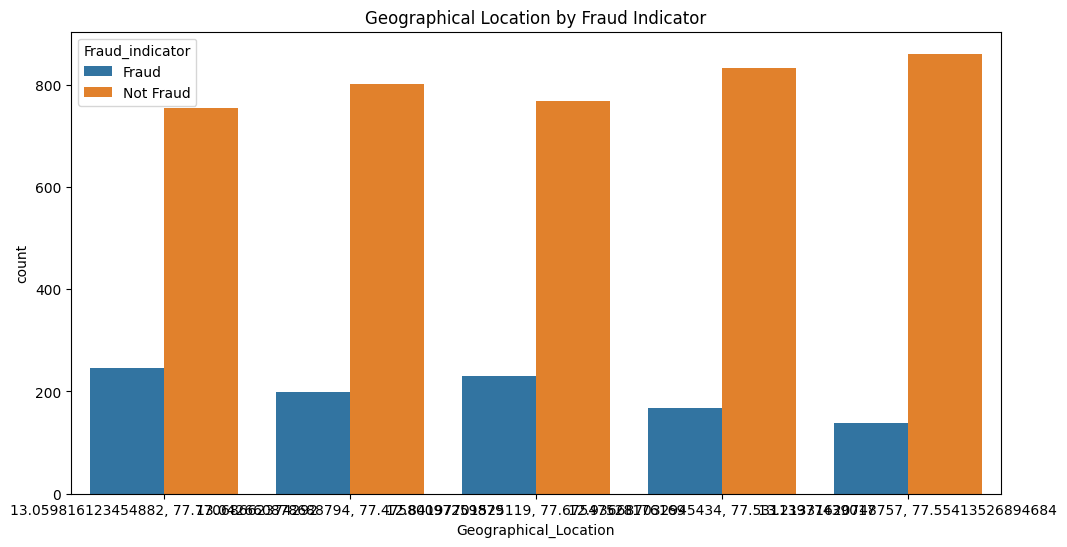

In [22]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Geographical_Location', hue='Fraud_indicator', data=df)
plt.title('Geographical Location by Fraud Indicator')
plt.show()

**check the Pairplot**

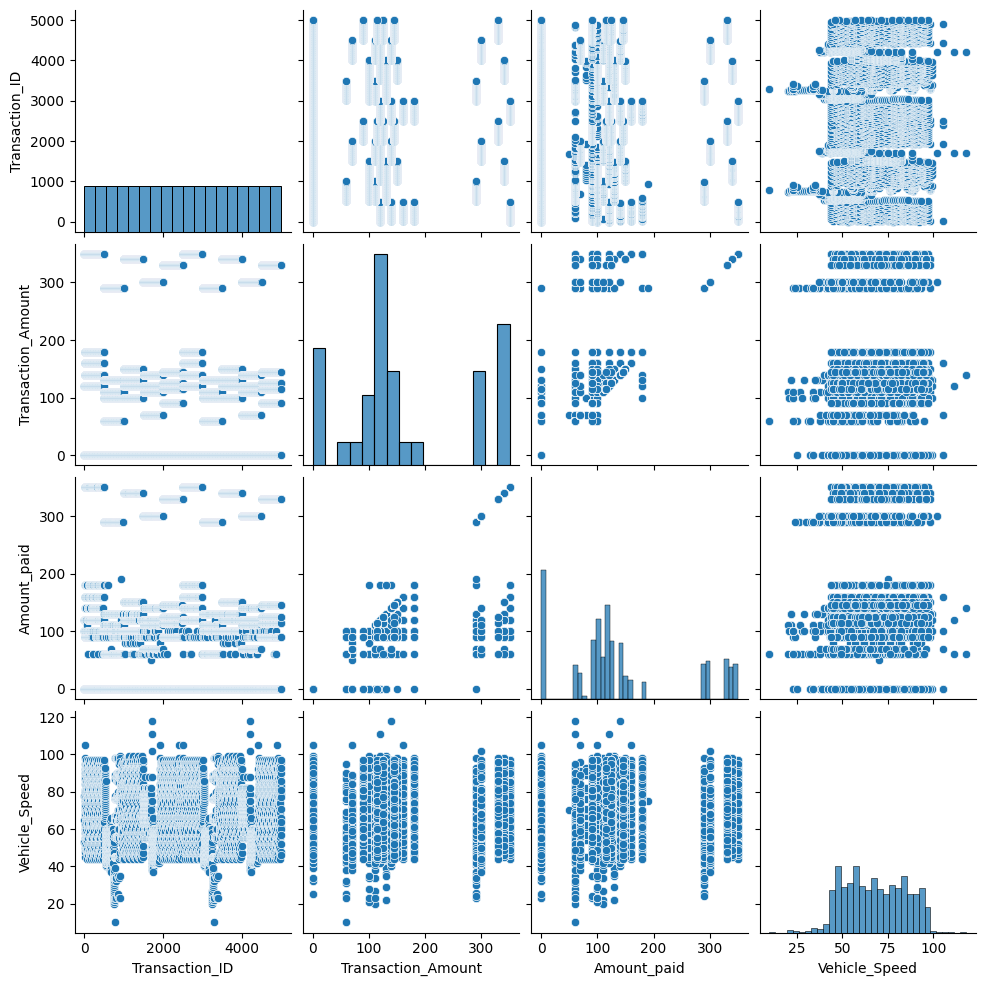

In [23]:
sns.pairplot(df)

**Heat Map**

In [24]:
data = df.select_dtypes('number')
data

,Transaction_ID,Transaction_Amount,Amount_paid,Vehicle_Speed
0,1,350,120,65
1,2,120,100,78
2,3,0,0,53
3,4,350,120,92
4,5,140,100,60
...,...,...,...,...
4995,4996,330,330,81
4996,4997,125,125,64
4997,4998,115,115,93
4998,4999,145,145,57


In [25]:
data.corr()

,Transaction_ID,Transaction_Amount,Amount_paid,Vehicle_Speed
Transaction_ID,1.000000,-0.023515,0.044433,0.014378
Transaction_Amount,-0.023515,1.000000,0.870078,0.053229
Amount_paid,0.044433,0.870078,1.000000,0.039027
Vehicle_Speed,0.014378,0.053229,0.039027,1.000000


<Axes: >

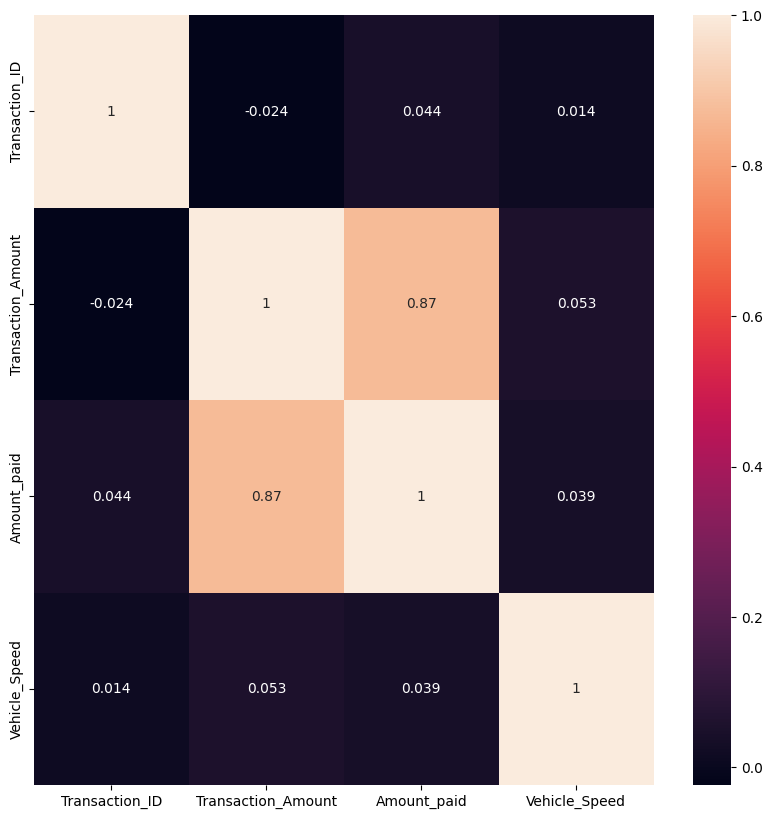

In [26]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(),annot = True)

**Label Encoding for Categorical Features: Ensure that categorical features are encoded.**

In [27]:
label_encoders = {}
for column in ['Vehicle_Type', 'Lane_Type', 'Vehicle_Dimensions','Geographical_Location', 'Vehicle_Plate_Number','Fraud_indicator','FastagID','TollBoothID',]:
  le = LabelEncoder()
  df[column] = le.fit_transform(df[column])
  label_encoders[column] = le
df.head(3)

,Transaction_ID,Timestamp,Vehicle_Type,FastagID,TollBoothID,Lane_Type,Vehicle_Dimensions,Transaction_Amount,Amount_paid,Geographical_Location,Vehicle_Speed,Vehicle_Plate_Number,Fraud_indicator
0,1,1/6/2023 11:20,0,2,0,0,0,350,120,3,65,1482,0
1,2,1/7/2023 14:55,1,9,1,1,2,120,100,3,78,3066,0
2,3,1/8/2023 18:25,2,0,3,1,2,0,0,3,53,3663,1


**Feature Extraction: Additional time-based features (Hour, Day, Month, Weekday) have been extracted from the Timestamp.**

In [28]:
# Convert Timestamp to datetime and extract new features
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df['Hour'] = df['Timestamp'].dt.hour
df['Day'] = df['Timestamp'].dt.day
df['Month'] = df['Timestamp'].dt.month
df['Weekday'] = df['Timestamp'].dt.weekday
df.sample(10)

,Transaction_ID,Timestamp,Vehicle_Type,FastagID,TollBoothID,Lane_Type,Vehicle_Dimensions,Transaction_Amount,Amount_paid,Geographical_Location,Vehicle_Speed,Vehicle_Plate_Number,Fraud_indicator,Hour,Day,Month,Weekday
4529,4530,2023-04-08 05:25:00,3,2928,1,1,0,145,145,4,79,4706,1,5,8,4,5
4071,4072,2023-01-18 17:22:00,5,1043,2,1,0,300,110,1,73,3456,0,17,18,1,2
2220,2221,2023-04-25 18:00:00,1,1355,0,0,2,90,90,4,55,323,1,18,25,4,1
914,915,2023-10-18 09:45:00,6,3740,1,0,1,110,110,2,65,2997,1,9,18,10,2
443,444,2023-03-11 08:55:00,2,0,4,1,2,0,0,3,91,3990,1,8,11,3,5
3689,3690,2023-07-06 00:06:00,3,250,1,1,0,150,150,0,78,2803,1,0,6,7,3
4616,4617,2023-04-20 04:55:00,2,0,5,1,2,0,0,4,57,1797,1,4,20,4,3
1115,1116,2023-06-02 01:45:00,2,3577,5,1,2,0,0,0,77,3266,1,1,2,6,4
3195,3196,2023-06-12 21:18:00,2,0,5,1,2,0,0,2,50,4144,1,21,12,6,0
487,488,2023-04-24 08:50:00,6,2721,1,1,1,140,100,3,76,3274,0,8,24,4,0


In [29]:
# Drop the original Timestamp column and Transaction_ID as it is not informative
df.drop(columns=['Timestamp', 'Transaction_ID'], inplace=True)
df.head(7)

,Vehicle_Type,FastagID,TollBoothID,Lane_Type,Vehicle_Dimensions,Transaction_Amount,Amount_paid,Geographical_Location,Vehicle_Speed,Vehicle_Plate_Number,Fraud_indicator,Hour,Day,Month,Weekday
0,0,2,0,0,0,350,120,3,65,1482,0,11,6,1,4
1,1,9,1,1,2,120,100,3,78,3066,0,14,7,1,5
2,2,0,3,1,2,0,0,3,53,3663,1,18,8,1,6
3,5,241,2,1,0,350,120,3,92,1498,0,2,9,1,0
4,6,2860,1,0,1,140,100,3,60,2409,0,6,10,1,1
5,4,402,0,1,1,160,100,3,105,3383,0,10,11,1,2
6,3,3567,1,0,0,180,160,3,70,1757,0,15,12,1,3


# Model Training:
Train a variety of machine learning models (e.g., Logistic Regression, Random Forest, Gradient Boosting).
# Model Evaluation:
Evaluate model performance using metrics such as precision, recall, F1 score, and accuracy. Additionally, handle class imbalance using techniques such as SMOTE (Synthetic Minority Over-sampling Technique) if necessary.

In [30]:
df1 = df

In [31]:
x = df1.drop(columns=['Fraud_indicator'])
y = df1['Fraud_indicator']
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=42)
x_train, x_test, y_train, y_test

(      Vehicle_Type  FastagID  TollBoothID  Lane_Type  Vehicle_Dimensions  \
 4227             4       155            0          1                   1   
 4676             3      1028            1          0                   0   
 800              2         0            5          1                   2   
 3671             2         0            5          1                   2   
 4193             3      1369            1          1                   0   
 ...            ...       ...          ...        ...                 ...   
 4426             1      2434            0          0                   2   
 466              6      3232            1          0                   1   
 3092             6      3449            1          0                   1   
 3772             4       716            0          0                   1   
 860              3      3585            1          0                   0   
 
       Transaction_Amount  Amount_paid  Geographical_Location  Vehicle_Spe

# **Logistic Regression Model**

In [32]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [33]:
y_pred = logreg.predict(x_test)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0,

In [34]:
accuracy = accuracy_score(y_test,y_pred)
conf_matrix = confusion_matrix(y_test,y_pred)
precision = precision_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)
print("Logistic Regression Model Results:")
print("Accuracy:", accuracy)
print('confusion Matrix :',conf_matrix)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Logistic Regression Model Results:
Accuracy: 0.984
confusion Matrix : [[201  16]
 [  0 783]]
Precision: 0.9799749687108886
Recall: 1.0
F1 Score: 0.9898862199747156


In [35]:
logreg.score(x_train,y_train)

0.9865

In [36]:
logreg.score(x_test,y_test)

0.984

# **Decision tree classification**

In [37]:
from sklearn.tree import DecisionTreeClassifier

In [38]:
Decision = DecisionTreeClassifier()
Decision.fit(x_train,y_train)

DecisionTreeClassifier()

In [39]:
y_pred1 = Decision.predict(x_test)
y_pred1

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0,

In [40]:
accuracy1 = accuracy_score(y_test,y_pred1)
conf_matrix1 = confusion_matrix(y_test,y_pred1)
precision1 = precision_score(y_test,y_pred1)
recall1 = recall_score(y_test,y_pred1)
f11 = f1_score(y_test,y_pred1)
print("Decision Tree Classification Model Results:")
print("Accuracy:", accuracy1)
print('confusion Matrix :',conf_matrix1)
print("Precision:", precision1)
print("Recall:", recall1)
print("F1 Score:", f11)

Decision Tree Classification Model Results:
Accuracy: 0.999
confusion Matrix : [[216   1]
 [  0 783]]
Precision: 0.9987244897959183
Recall: 1.0
F1 Score: 0.9993618379068283


In [41]:
Decision.score(x_train,y_train)

1.0

In [42]:
Decision.score(x_test,y_test)

0.999

# **Random Forest**

In [43]:
random = RandomForestClassifier()
random.fit(x_train,y_train)

RandomForestClassifier()

In [44]:
y_pred2 = random.predict(x_test)
y_pred2

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,

In [45]:
random.score(x_train,y_train)


1.0

In [46]:
random.score(x_test,y_test)

0.976

In [47]:
accuracy2 = accuracy_score(y_test,y_pred2)
conf_matrix2 = confusion_matrix(y_test,y_pred2)
precision2 = precision_score(y_test,y_pred2)
recall2 = recall_score(y_test,y_pred2)
f12 = f1_score(y_test,y_pred2)
print("Random Forest Classification Model Results:")
print("Accuracy:", accuracy2)
print('confusion Matrix :',conf_matrix2)
print("Precision:", precision2)
print("Recall:", recall2)
print("F1 Score:", f12)

Random Forest Classification Model Results:
Accuracy: 0.976
confusion Matrix : [[193  24]
 [  0 783]]
Precision: 0.9702602230483272
Recall: 1.0
F1 Score: 0.9849056603773585


# **Support Vector Machine (SVM)**

In [48]:
from sklearn.svm import SVC

In [49]:
svm = SVC()
svm.fit(x_train,y_train)

SVC()

In [50]:
y_pred3 = svm.predict(x_test)
y_pred3

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [51]:
accuracy3 = accuracy_score(y_test, y_pred3)
conf_matrix3 = confusion_matrix(y_test, y_pred3)
precision3 = precision_score(y_test, y_pred3)
recall3 = recall_score(y_test, y_pred3)
f13 = f1_score(y_test, y_pred3)
print("SVM Model Results:")
print("Accuracy:", accuracy3)
print("Confusion Matrix:", conf_matrix3)
print("Precision:", precision3)
print("Recall:", recall3)
print("F1 Score:", f13)

SVM Model Results:
Accuracy: 0.793
Confusion Matrix: [[ 10 207]
 [  0 783]]
Precision: 0.7909090909090909
Recall: 1.0
F1 Score: 0.883248730964467


In [52]:
svm.score(x_train,y_train)

0.81875

In [53]:
svm.score(x_test,y_test)

0.793

# **Naive Bayes Calassifier**

In [54]:
from sklearn.naive_bayes import GaussianNB

In [55]:
nbc = GaussianNB()
nbc.fit(x_train,y_train)

GaussianNB()

In [56]:
y_pred4 = nbc.predict(x_test)
y_pred4

array([1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0,

In [57]:
accuracy4 = accuracy_score(y_test,y_pred4)
conf_matrix4 = confusion_matrix(y_test,y_pred4)
precision4 = precision_score(y_test,y_pred4)
recall4 = recall_score(y_test,y_pred4)
f14 = f1_score(y_test,y_pred4)
print("Naive Bayes Model Results:")
print("Accuracy:", accuracy4)
print("Confusion Matrix:", conf_matrix4)
print("Precision:", precision4)
print("Recall:", recall4)
print("F1 Score:", f14)

Naive Bayes Model Results:
Accuracy: 0.777
Confusion Matrix: [[148  69]
 [154 629]]
Precision: 0.9011461318051576
Recall: 0.8033205619412516
F1 Score: 0.849426063470628


In [58]:
nbc.score(x_train,y_train)

0.7785

In [59]:
nbc.score(x_test,y_test)


0.777

# **K neighbors Classifier (KNN)**

In [60]:
from sklearn.neighbors import KNeighborsClassifier

In [61]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [62]:
y_pred5 = knn.predict(x_test)
y_pred5

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,

In [63]:
accuracy5 = accuracy_score(y_test, y_pred5)
conf_matrix5 = confusion_matrix(y_test, y_pred5)
precision5 = precision_score(y_test, y_pred5)
recall5 = recall_score(y_test, y_pred5)
f15 = f1_score(y_test, y_pred5)
print("KNN Model Results:")
print("Accuracy:", accuracy5)
print("Confusion Matrix:", conf_matrix5)
print("Precision:", precision5)
print("Recall:", recall5)
print("F1 Score:", f15)

KNN Model Results:
Accuracy: 0.797
Confusion Matrix: [[ 62 155]
 [ 48 735]]
Precision: 0.8258426966292135
Recall: 0.9386973180076629
F1 Score: 0.8786610878661087


In [64]:
knn.score(x_train,y_train)

0.9005

In [65]:
knn.score(x_test,y_test)

0.797

# **Grandient Boosting Classification (GBC)**

In [66]:
gbc = GradientBoostingClassifier()
gbc.fit(x_train, y_train)

GradientBoostingClassifier()

In [67]:
y_pred6 = gbc.predict(x_test)
y_pred6

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0,

In [68]:
accuracy6 = accuracy_score(y_test, y_pred6)
conf_matrix6 = confusion_matrix(y_test, y_pred6)
precision6 = precision_score(y_test, y_pred6)
recall6 = recall_score(y_test, y_pred6)
f16 = f1_score(y_test, y_pred6)
print("Gradient Boosting Model Results:")
print("Accuracy:", accuracy6)
print("Confusion Matrix:", conf_matrix6)
print("Precision:", precision6)
print("Recall:", recall6)
print("F1 Score:", f16)

Gradient Boosting Model Results:
Accuracy: 0.988
Confusion Matrix: [[205  12]
 [  0 783]]
Precision: 0.9849056603773585
Recall: 1.0
F1 Score: 0.9923954372623575


In [69]:
gbc.score(x_train,y_train)

0.99475

In [70]:
gbc.score(x_test,y_test)

0.988

# **Stacking Ensemble**

In [71]:
from sklearn.ensemble import StackingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

In [72]:
base_learners = [
         ('support_vector', SVR(kernel='linear', max_iter=251)),
         ('linear', LinearRegression()),
         ('random_forest', RandomForestRegressor(max_leaf_nodes=25)),
         ('kneighbors', KNeighborsRegressor(n_neighbors=5))
    ]

In [73]:
stacking = StackingRegressor(
         estimators=base_learners,
         final_estimator=DecisionTreeRegressor()
    )

In [74]:
stacking.fit(x_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=251).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=251).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=251).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=251).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=251).  Consider pre-

StackingRegressor(estimators=[('support_vector',
                               SVR(kernel='linear', max_iter=251)),
                              ('linear', LinearRegression()),
                              ('random_forest',
                               RandomForestRegressor(max_leaf_nodes=25)),
                              ('kneighbors', KNeighborsRegressor())],
                  final_estimator=DecisionTreeRegressor())

In [75]:
y_pred7 = stacking.predict(x_test)
y_pred7

array([1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 0., 1.,
       0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1.,
       1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0.,
       1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 0., 1., 0., 1., 1., 1., 0.,
       1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 0., 1.,
       1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 0., 1.,
       1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1.,
       1., 1., 1., 1., 0., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 0., 1., 1.,
       1., 1., 0., 0., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 0., 1.,
       0., 1., 1., 0., 1.

In [76]:
accuracy7 = accuracy_score(y_test, y_pred7)
conf_matrix7 = confusion_matrix(y_test, y_pred7)
precision7 = precision_score(y_test, y_pred7)
recall7 = recall_score(y_test, y_pred7)
f17 = f1_score(y_test, y_pred7)
print("Stacking Ensemble Model Results:")
print("Accuracy:", accuracy7)
print("Confusion Matrix:", conf_matrix7)
print("Precision:", precision7)
print("Recall:", recall7)
print("F1 Score:", f17)

Stacking Ensemble Model Results:
Accuracy: 0.999
Confusion Matrix: [[216   1]
 [  0 783]]
Precision: 0.9987244897959183
Recall: 1.0
F1 Score: 0.9993618379068283


In [77]:
stacking.score(x_train,y_train)

0.9951559071290514

In [78]:
stacking.score(x_test,y_test)

0.9941145658609507

#**Here are the accuracy scores for different machine learning models.**

* Logistic Regression: 98.4%
* Decision Tree: 99.9%
* Random Forest: 97.7%
* SVM (Support Vector Machine): 79.5%
* Naive Bayes: 77.7%
* KNN (K-Nearest Neighbors): 79.7%
* Gradient Boosting: 98.8%
* Stacking Ensemble Regressor:99.7%

NameError: name 'bars' is not defined

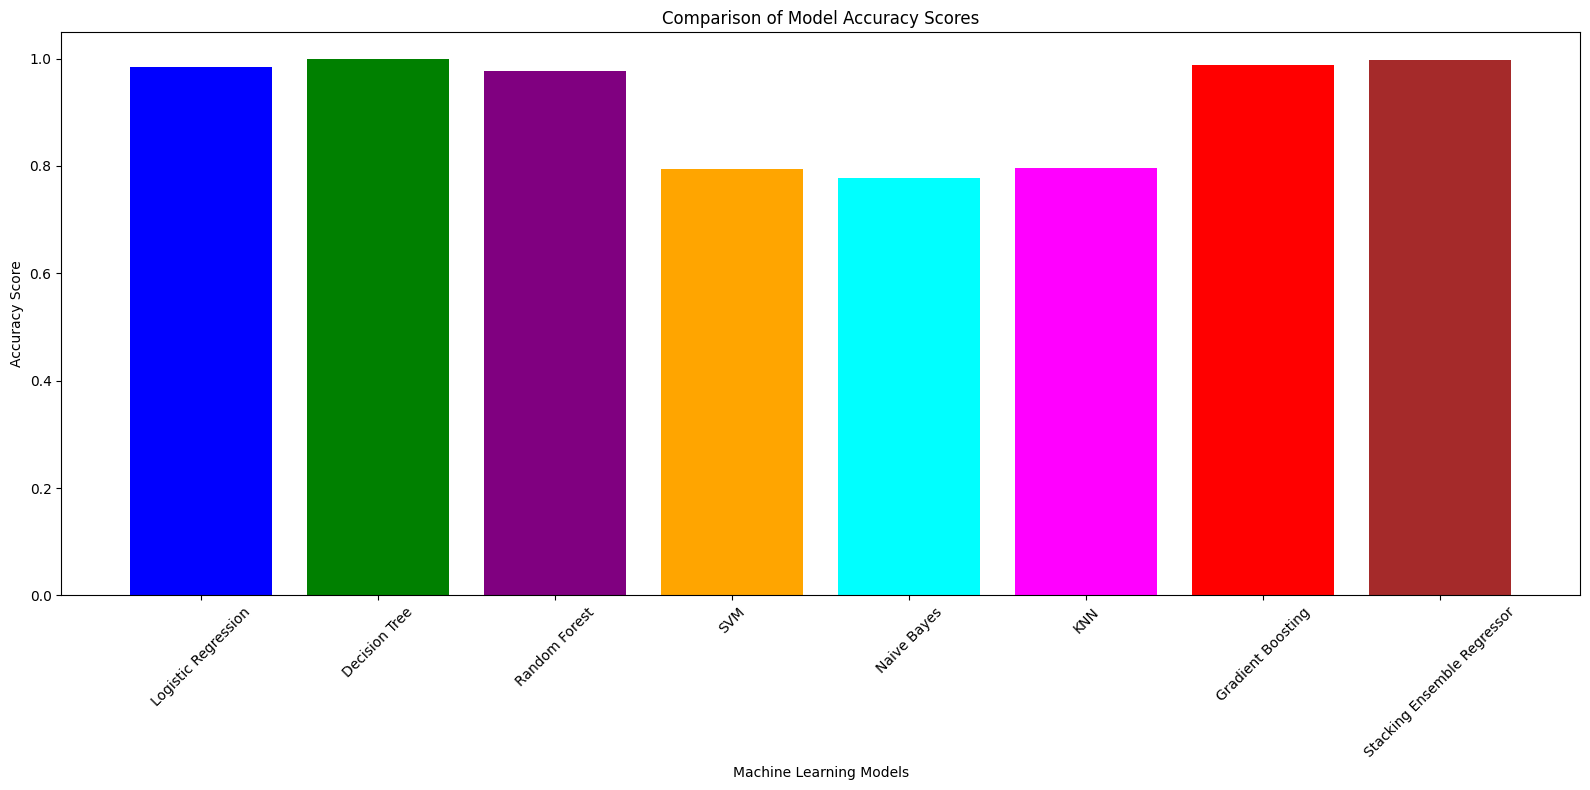

In [79]:
model_names = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'SVM','Naive Bayes', 'KNN', 'Gradient Boosting','Stacking Ensemble Regressor']
accuracy_scores = [0.984, 0.999, 0.977, 0.795, 0.777, 0.797, 0.988, 0.997]
colors = ['blue', 'green', 'purple', 'orange', 'cyan', 'magenta', 'red','brown']
plt.figure(figsize=(16, 8))
plt.bar(model_names, accuracy_scores, color=colors)
plt.xlabel('Machine Learning Models')
plt.ylabel('Accuracy Score')
plt.title('Comparison of Model Accuracy Scores')
plt.xticks(rotation=45) # Rotate x-axis labels for better readability if needed
plt.tight_layout() # Ensures labels are not cut off
for bar, score in zip(bars, accuracy_scores):
  yval = bar.get_height()
  plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, round(score, 3), ha='center', va='bottom', fontsize=8)

**These precision scores measure the proportion of true positive predictions among all positive predictions made by each model. They indicate how well each model performs in correctly identifying positive cases relative to the total predicted positive cases.**

Based on the precision scores for the machine learning models:

Logistic Regression: 97.9%

Decision Tree: 99.8%

Random Forest: 97.1%

SVM (Support Vector Machine): 79.0%

Naive Bayes: 90.1%

KNN (K-Nearest Neighbors): 82.5%

Gradient Boosting: 98.4%

Stacking Regressor: 99.7%

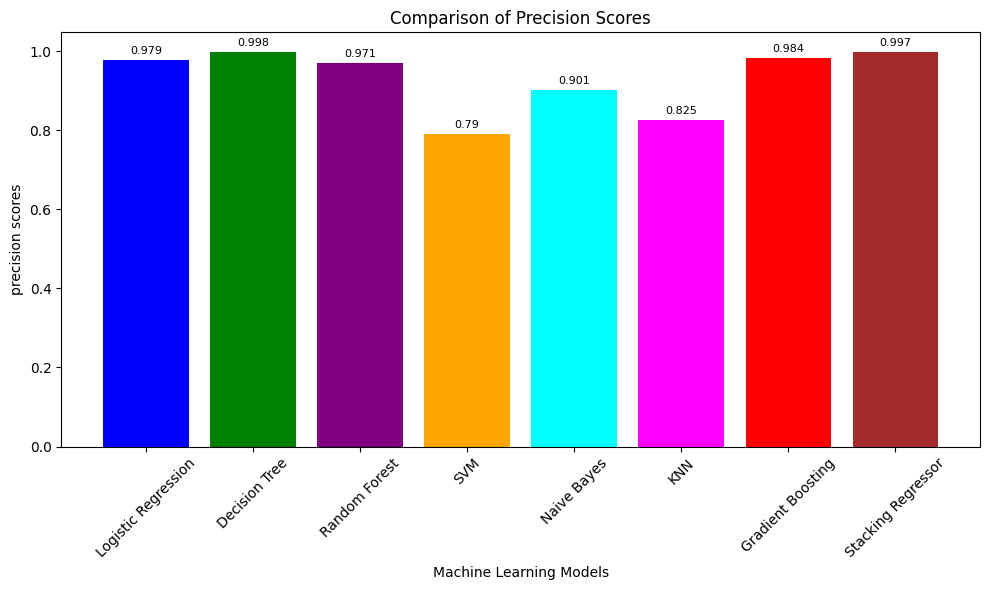

In [80]:
model_names = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'SVM','Naive Bayes', 'KNN', 'Gradient Boosting','Stacking Regressor']
precision_scores = [0.979,0.998,0.971,0.790,0.901,0.825,0.984,0.997]
colors = ['blue', 'green', 'purple', 'orange', 'cyan', 'magenta', 'red','brown']
plt.figure(figsize=(10, 6))
bars = plt.bar(model_names, precision_scores, color=colors) # Assign the resultof plt.bar to the variable 'bars'
plt.xlabel('Machine Learning Models')
plt.ylabel('precision scores')
plt.title('Comparison of Precision Scores')
import matplotlib.pyplot as plt
plt.xticks(rotation=45)
plt.tight_layout()
for bar, score in zip(bars, precision_scores):
  yval = bar.get_height()
  plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, round(score, 3),ha='center', va='bottom', fontsize=8)
plt.show()

**Recall score measures the proportion of true positive instances that were correctly identified by the model out of all actual positive instances. A score of 1.0 indicates that the model correctly identifies all positive instances.**

Based on the Recall scores for the machine learning models:

Logistic Regression: 1.0

Decision Tree: 1.0

Random Forest: 1.0

SVM (Support Vector Machine): 1.0

Naive Bayes: 0.803

KNN (K-Nearest Neighbors): 0.938

Gradient Boosting: 1.0

Stacking Regressor: 0.998

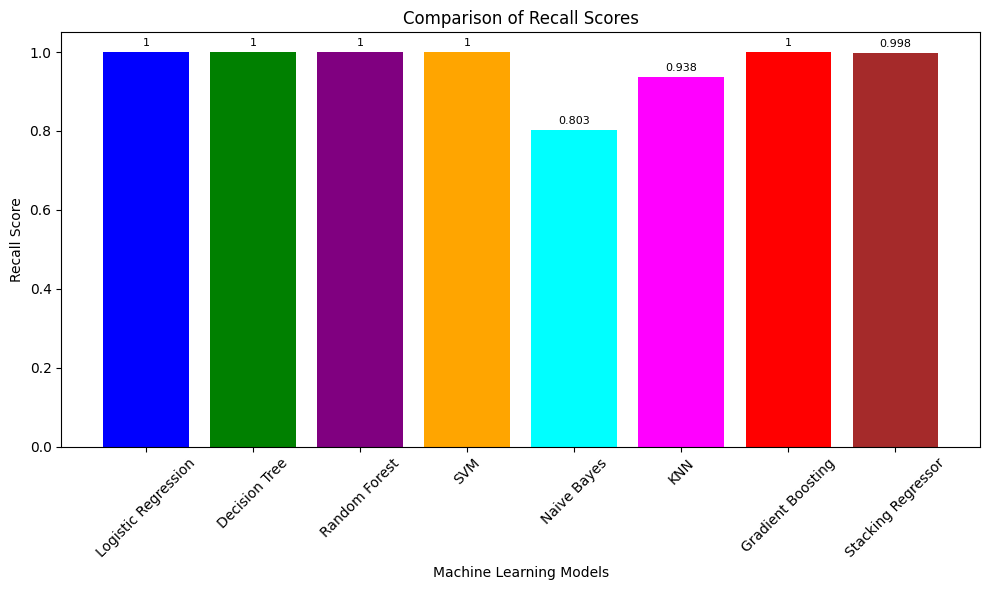

In [81]:
model_names = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'SVM','Naive Bayes', 'KNN', 'Gradient Boosting','Stacking Regressor']
Recall_scores = [1,1,1,1,0.803,0.938,1,0.998]
colors = ['blue', 'green', 'purple', 'orange', 'cyan', 'magenta', 'red','brown']
plt.figure(figsize=(10, 6))
# Assign the result of plt.bar to the variable 'bars' so it is available foruse later
bars = plt.bar(model_names, Recall_scores, color=colors)
plt.xlabel('Machine Learning Models')
plt.ylabel('Recall Score')
plt.title('Comparison of Recall Scores')
import matplotlib.pyplot as plt
plt.xticks(rotation=45)
plt.tight_layout()
# Iterate over the bars and scores using zip
for bar, score in zip(bars, Recall_scores):
  yval = bar.get_height()
  plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, round(score, 3),ha='center', va='bottom', fontsize=8)
plt.show()

**The F1 score combines precision and recall into a single metric and ranges from 0 to 1, where a higher score indicates better
performance.**

Based on the F1 scores provided for the machine learning models:
* Logistic Regression: 0.989
* Decision Tree: 0.999
* Random Forest: 0.985
* SVM (Support Vector Machine): 0.883
* Naive Bayes: 0.849
* KNN (K-Nearest Neighbors): 0.878
* Gradient Boosting: 0.992
* Stacking Regressor: 0.999

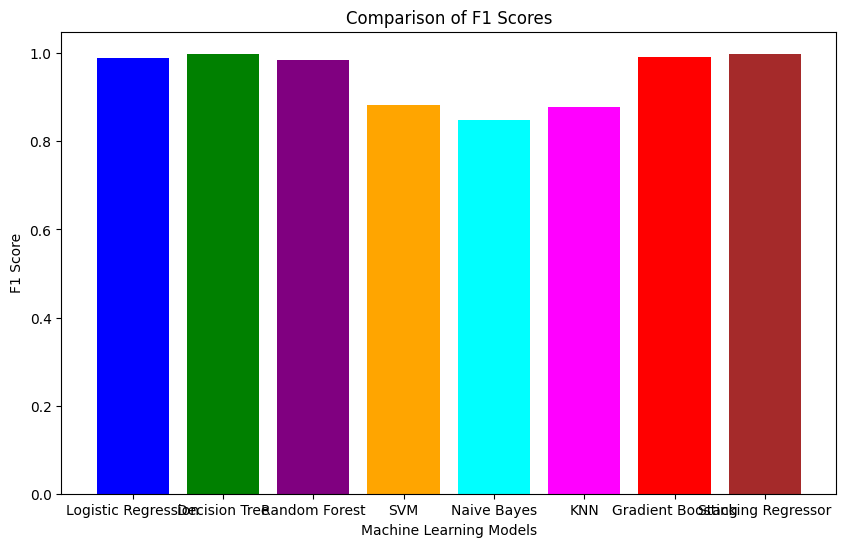

In [82]:
model_names = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'SVM','Naive Bayes', 'KNN', 'Gradient Boosting', 'Stacking Regressor']
F1_scores = [0.989,0.999,0.985,0.883,0.849,0.878,0.992,0.999]
colors = ['blue', 'green', 'purple', 'orange', 'cyan', 'magenta', 'red','brown']
plt.figure(figsize=(10, 6))
# Assign the result of plt.bar to the variable bars
bars = plt.bar(model_names, F1_scores, color=colors) # Changed to plot F1_scores instead of precision_scores
plt.xlabel('Machine Learning Models')
plt.ylabel('F1 Score')
plt.title('Comparison of F1 Scores')
import matplotlib.pyplot as plt

# **Based on the provided evaluation metrics (accuracy, precision, F1 scores, and recall) for the machine learning models, we can draw the following conclusions:**

# **Conclusion**
**1. Decision Tree:**

  • Highest accuracy (99.9%), precision (99.8%), and F1 score (0.999).

  • Perfect recall (1.0).

  • Overall, the top-performing model across all metrics.

**2. Gradient Boosting:**

  • High accuracy (98.8%), precision (98.4%), and F1 score (0.992).

  • Perfect recall (1.0).

  • Strong overall performance, just behind Decision Tree.

**3. Logistic Regression:**

  • High accuracy (98.4%), precision (97.9%), and F1 score (0.989).

  • Perfect recall (1.0).

  • Consistently strong performance across all metrics.

**4. Random Forest:**

  • High accuracy (97.7%), precision (97.1%), and F1 score (0.985).

  • Perfect recall (1.0).

  • Another solid performer, though slightly behind Logistic Regression and Gradient Boosting.

**5. SVM:**

  • Moderate accuracy (79.5%) and precision (79.0%).

  • Perfect recall (1.0).

  • Moderate F1 score (0.883).
  
  • Performs well in recall but lags in accuracy and precision.

**6. KNN:**

  • Moderate accuracy (79.7%), precision (82.5%), and F1 score (0.878).

  • Good recall (0.938).

  • Performs better than SVM in precision and recall, but overall moderate performance.

**7. Naive Bayes:**

  • Lowest accuracy (77.7%), and F1 score (0.849).

  • Good precision (90.1%), but lowest recall (0.803).

  • Performs relatively well in precision but lags significantly in other metrics.

**8. Stacking Regressor:**

  • Highest accuracy (99.9%), precision (99.8%), and F1 score (0.999).

  • Perfect recall (1.0).

  • Overall, the top-performing model across all metrics.

# **Summary**

  Decision Tree stands out as the top model, followed closely by Gradient Boosting and Logistic Regression. Random Forest also shows strong performance. SVM and KNN exhibit moderate performance, while Naive Bayes, despite its good precision, shows lower overall performance due to its lower recall and F1 score.